In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.shape

(18249, 14)

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.shape

(18249, 13)

In [8]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
13353,2016-09-04,1.52,4206.78,257.09,23.18,0.00,3926.51,3883.18,43.33,0.00,organic,2016,NewOrleansMobile
14320,2016-01-31,1.41,69115.72,29502.87,4582.19,2.77,35027.89,34397.13,630.76,0.00,organic,2016,SouthCentral
5361,2016-11-20,1.61,38598.98,814.68,27876.91,1.00,9906.39,9906.39,0.00,0.00,conventional,2016,Syracuse
10466,2015-03-22,1.53,57978.41,13957.53,29037.44,4426.59,10556.85,7426.95,3129.90,0.00,organic,2015,Midsouth
7506,2017-04-30,1.19,2080438.13,1092962.79,415847.89,7112.21,564515.24,516294.46,38654.81,9565.97,conventional,2017,Plains


In [9]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [12]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

Checking Null Values

<Axes: >

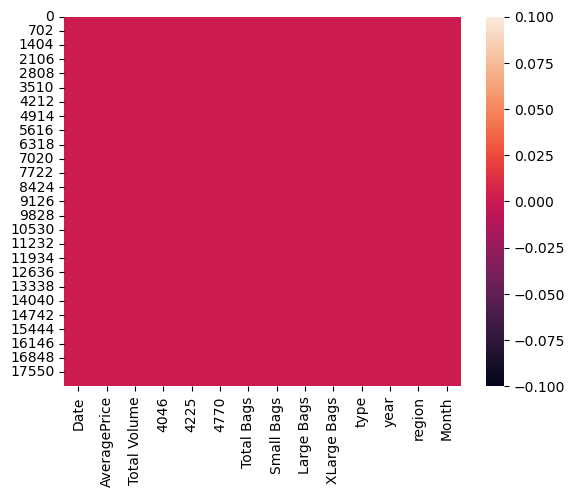

In [14]:
sns.heatmap(df.isnull())

In [74]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
dtype: int64

In [75]:
df.groupby('year')['type'].value_counts()

year  type
2015  0       2808
      1       2607
2016  0       2804
      1       2734
2017  0       2860
      1       2819
2018  0        648
      1        648
Name: type, dtype: int64

In [76]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
count,17928.000000,17928.000000,17928.000000,17928.000000,17928.000000,17928.000000,17928.000000,17928.000000,17928.000000,17928.000000,17928.000000,17928.000000,17928.000000
mean,0.861658,11.359568,9.033598,9.894864,5.126360,10.254767,9.816145,7.160329,2.297341,0.491299,2016.159304,26.348561,6.171241
std,0.163503,2.279749,3.356205,2.792118,4.140487,2.196342,2.387276,3.829106,3.516295,0.499938,0.939487,15.570279,3.541152
min,0.378436,4.449218,0.000000,1.286474,0.000000,3.433987,1.974081,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000
25%,0.737164,9.330599,6.802400,8.045912,0.000000,8.620664,8.076748,4.939676,0.000000,0.000000,2015.000000,13.000000,3.000000
50%,0.858662,11.640953,9.132338,10.325715,5.340058,10.643967,10.234451,7.948837,0.000000,0.000000,2016.000000,26.000000,6.000000
75%,0.978326,13.002976,11.644903,11.953567,8.774762,11.638183,11.348987,10.041665,5.003745,1.000000,2017.000000,40.000000,9.000000
max,1.355835,17.950767,16.939795,16.834499,14.750207,16.779398,16.409614,15.559322,12.758207,1.000000,2018.000000,53.000000,12.000000


In [77]:
df['type'].value_counts()

0    9120
1    8808
Name: type, dtype: int64

<Axes: xlabel='year', ylabel='AveragePrice'>

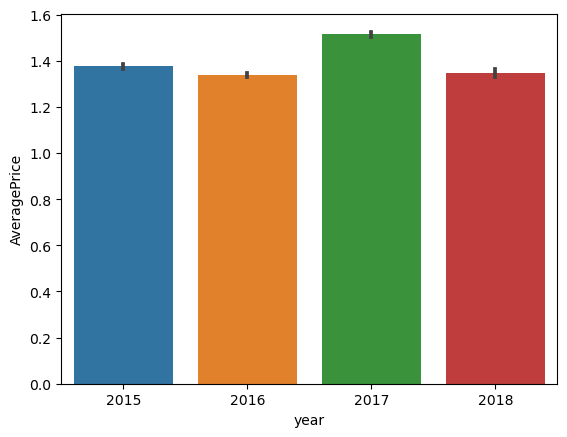

In [15]:
sns.barplot(x='year',y='AveragePrice',data=df)

<Axes: xlabel='Month', ylabel='AveragePrice'>

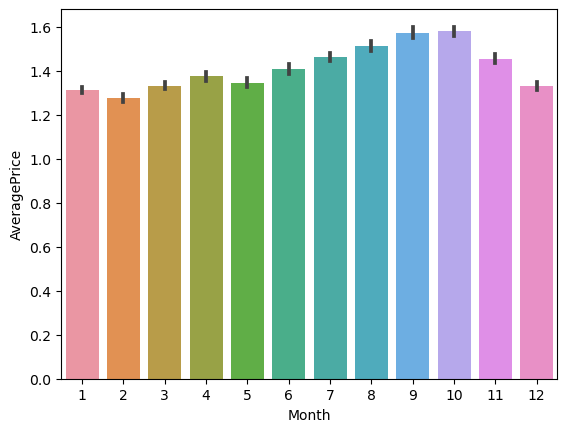

In [16]:
sns.barplot(x='Month',y='AveragePrice',data=df)

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>],
       [<Axes: title={'center': '4046'}>,
        <Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>],
       [<Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>],
       [<Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

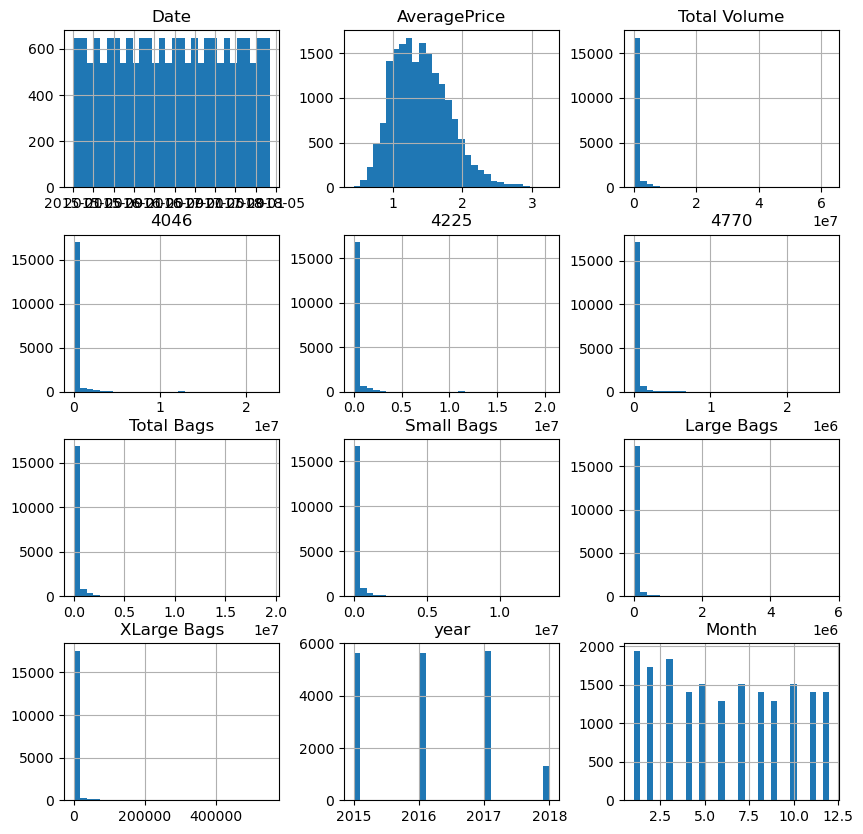

In [17]:
df.hist(bins=30,figsize=(10,10))

Checking Skewness of the dataset

In [18]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

In [19]:
new_cols=('AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')

In [20]:
for i in new_cols:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [21]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
Month           0.106617
dtype: float64

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>],
       [<Axes: title={'center': '4046'}>,
        <Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>],
       [<Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>],
       [<Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

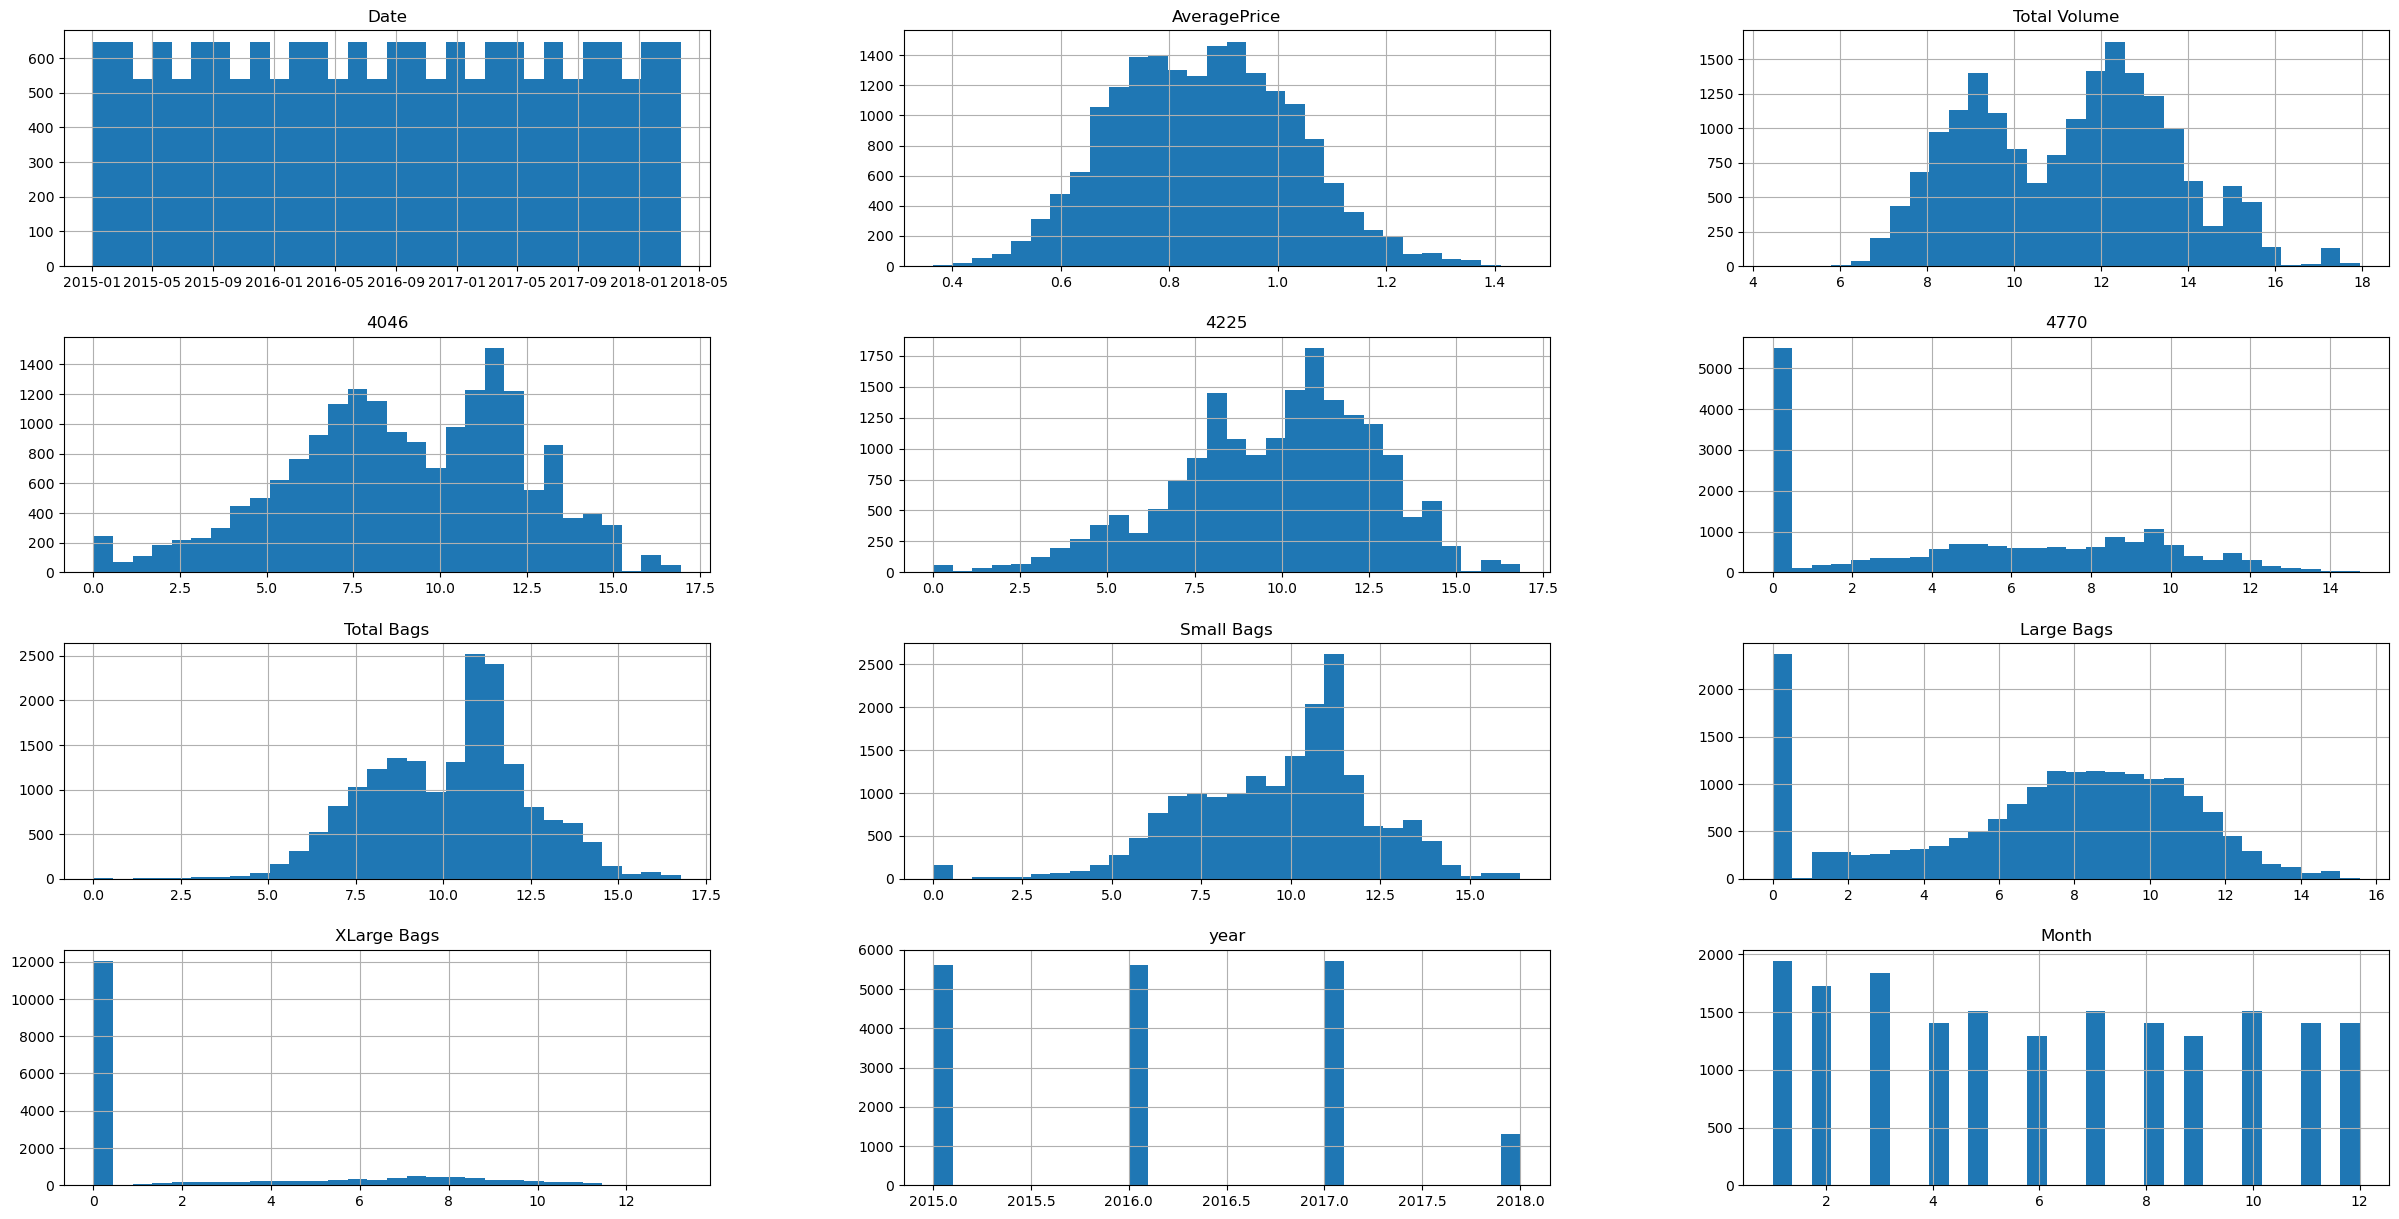

In [22]:
df.hist(bins=30,figsize=(30,15))

In [23]:
df.replace({'type':{'conventional':0,'organic':1}},inplace=True)

In [24]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,Albany,12
1,2015-12-20,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,Albany,12
2,2015-12-13,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,Albany,12
3,2015-12-06,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,Albany,12
4,2015-11-29,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,Albany,11


In [25]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [26]:
df['region'].nunique()

54

In [27]:
df.replace({'region':{'Albany':0,'Atlanta':1,'BaltimoreWashington':2,'Boise':3,'Boston':4,'BuffaloRochester':5,'California':6,'Charlotte':7,'Chicago':8,'CincinnatiDayton':9,'Columbus':10,'DallasFtWorth':11,'Denver':12,'Detroit':13,'GrandRapids':14,'GreatLakes':15,'HarrisburgScranton':16,'HartfordSpringfield':17,'Houston':18,'Indianapolis':19,'Jacksonville':20,'LasVegas':21,'LosAngeles':22,'Louisville':23,'MiamiFtLauderdale':24,'Midsouth':25,'Nashville':26,'NewOrleansMobile':27,'NewYork':28,'Northeast':29,'NorthernNewEngland':30,'Orlando':31,'Philadelphia':32,'PhoenixTucson':33,'Pittsburgh':34,'Plains':35,'Portland':36,'RaleighGreensboro':37,'RichmondNorfolk':38,'Roanoke':39,'Sacramento':40,'SanDiego':41,'SanFrancisco':42,'Seattle':43,'SouthCarolina':44,'SouthCentral':45,'Southeast':46,'Spokane':47,'StLouis':48,'Syracuse':49,'Tampa':50,'TotalUS':51,'West':52,'WestTexNewMexico':53}},inplace=True)

In [28]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
18244,2018-02-04,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2
18245,2018-01-28,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1
18246,2018-01-21,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1
18247,2018-01-14,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1
18248,2018-01-07,0.963174,9.769418,7.971006,7.765200,5.418453,9.393924,9.391757,3.296207,0.0,1,2018,53,1


Checking the Outliers using Box Plot

AveragePrice       Axes(0.125,0.712609;0.133621x0.167391)
Total Volume    Axes(0.285345,0.712609;0.133621x0.167391)
4046             Axes(0.44569,0.712609;0.133621x0.167391)
4225            Axes(0.606034,0.712609;0.133621x0.167391)
4770            Axes(0.766379,0.712609;0.133621x0.167391)
Total Bags         Axes(0.125,0.511739;0.133621x0.167391)
Small Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Large Bags       Axes(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.606034,0.511739;0.133621x0.167391)
type            Axes(0.766379,0.511739;0.133621x0.167391)
year                Axes(0.125,0.31087;0.133621x0.167391)
region           Axes(0.285345,0.31087;0.133621x0.167391)
Month             Axes(0.44569,0.31087;0.133621x0.167391)
dtype: object

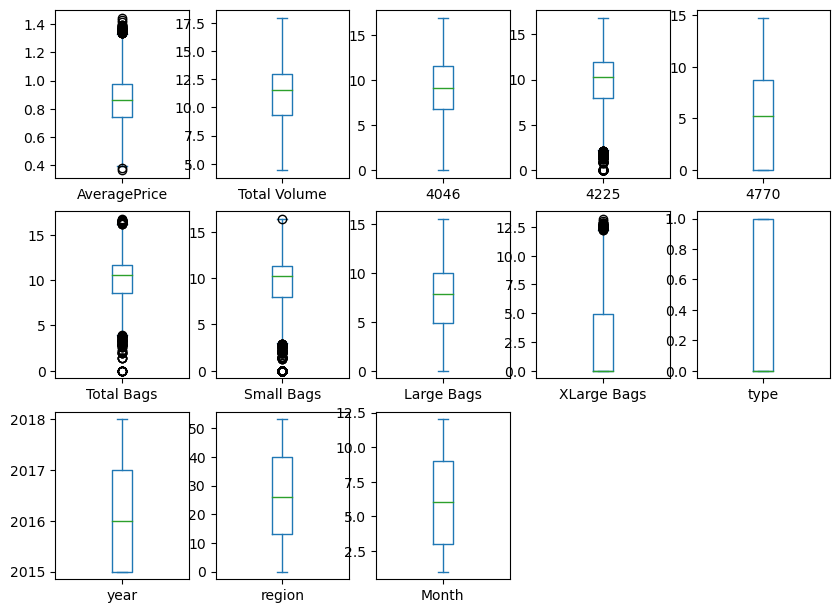

In [29]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

In [30]:
df.drop('Date',axis=1,inplace=True)

In [31]:
df.shape

(18249, 13)

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.111918,0.107282,0.609752,0.374936,0.279143,0.494074,0.247796,0.669747,0.645526,0.999836,1.221282,1.700252,1.647632
1,0.060020,0.175949,0.737707,0.305200,0.233838,0.454761,0.213093,0.658279,0.645526,0.999836,1.221282,1.700252,1.647632
2,1.255560,0.158690,0.688840,0.618892,0.042078,0.523041,0.273995,0.643743,0.645526,0.999836,1.221282,1.700252,1.647632
3,0.801087,0.017121,0.583598,0.472808,0.181974,0.672335,0.409182,0.576571,0.645526,0.999836,1.221282,1.700252,1.647632
4,0.243636,0.207558,0.638425,0.298852,0.171717,0.644845,0.388616,0.475393,0.645526,0.999836,1.221282,1.700252,1.364669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.623491,0.685006,0.407310,0.878279,1.217613,0.299689,0.085548,0.272479,0.645526,1.000164,1.970504,1.700811,1.181997
18245,0.805435,0.775077,0.568306,0.594835,1.217613,0.466102,0.232904,0.346517,0.645526,1.000164,1.970504,1.700811,1.464959
18246,1.153743,0.778901,0.568251,0.712597,0.370548,0.459975,0.215422,0.872380,0.645526,1.000164,1.970504,1.700811,1.464959
18247,1.279375,0.707798,0.494407,0.644192,0.370240,0.391424,0.155249,0.829787,0.645526,1.000164,1.970504,1.700811,1.464959


In [33]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
(18249, 13)


In [34]:
df1=df[(z<3).all(axis=1)]
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1


In [35]:
df=df1
print(df.shape)

(17928, 13)


<Axes: >

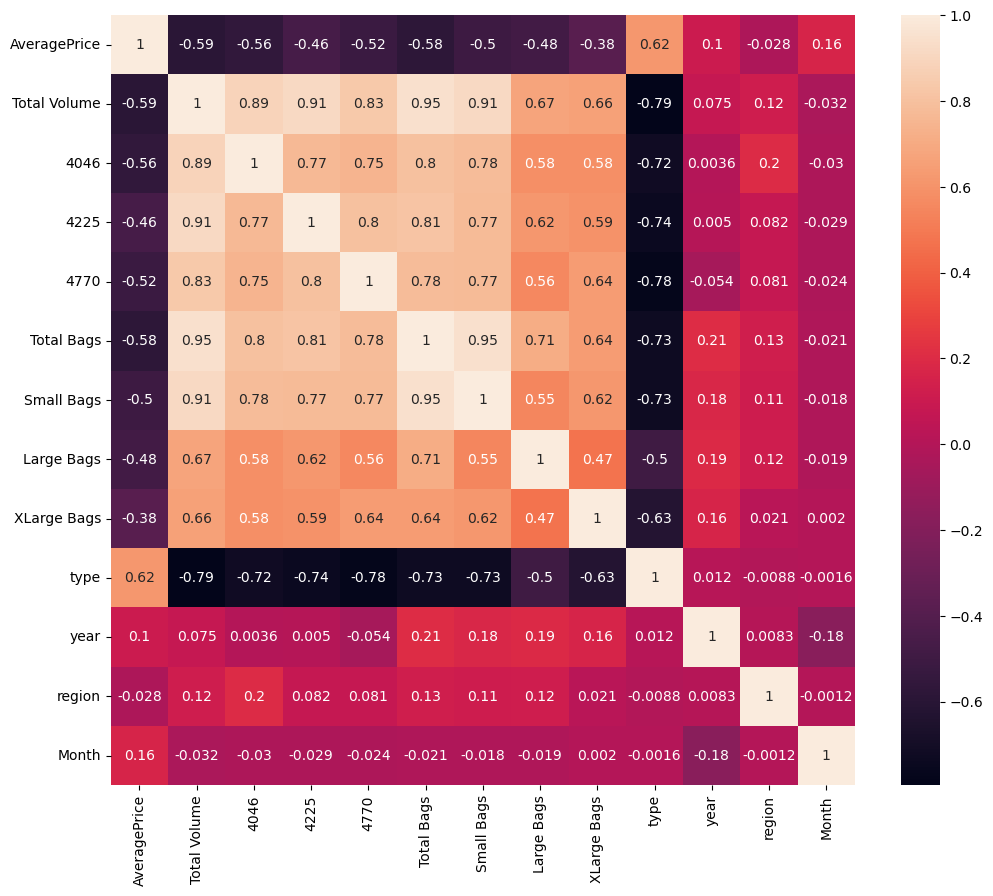

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

Implementing Machine Learning

In [37]:
x=df.iloc[:,1:12]
y=df.iloc[:,0]

In [38]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53


In [39]:
y

0        0.845868
1        0.854415
2        0.657520
3        0.732368
4        0.824175
           ...   
18244    0.966984
18245    0.996949
18246    1.054312
18247    1.075002
18248    0.963174
Name: AveragePrice, Length: 17928, dtype: float64

Training and Testing phase of the model

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14342, 11)
(3586, 11)
(14342,)
(3586,)


In [42]:
new=LinearRegression()
new.fit(x_train,y_train)

LinearRegression()

In [43]:
new.intercept_

-61.010610051094474

In [44]:
new.score(x_test,y_test)

0.5444546170364726

In [45]:
result=new.predict(x_test)
print('Predicted Value',result)
print('Actual Value',y_test)

Predicted Value [0.76761846 1.0531501  0.81636377 ... 0.84369564 0.87157508 0.77880418]
Actual Value 2270     0.703098
17000    1.291984
4935     0.756122
12917    0.867100
16585    0.896088
           ...   
1263     0.815365
6455     0.732368
2549     0.858662
12916    0.891998
3376     0.636577
Name: AveragePrice, Length: 3586, dtype: float64


In [46]:
print('Mean Squared Error:', MSE(y_test,result))

Mean Squared Error: 0.012166799354347765


In [47]:
print('Mean Absolute Error:', MAE(y_test,result))

Mean Absolute Error: 0.08722220657437686


In [48]:
print('Root Mean Squared Error:', np.sqrt(MSE(y_test,result)))

Root Mean Squared Error: 0.11030321552134265


In [49]:
print('R2 Score:', r2_score(y_test,result))

R2 Score: 0.5444546170364726


After getting the above results we got to know that the root mean squared error is 0.1103 which means the model is good at pedictions.

Using Random Foest Regressor

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14342, 11)
(3586, 11)
(14342,)
(3586,)


In [52]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
rf.score(x_train,y_train)

0.9798484873323265

In [54]:
new1=rf.predict(x_test)
print("Predicted value",new1)
print("Actual value", y_test)

Predicted value [0.73003749 1.2483473  0.77025646 ... 0.85765287 0.87745595 0.68314088]
Actual value 2270     0.703098
17000    1.291984
4935     0.756122
12917    0.867100
16585    0.896088
           ...   
1263     0.815365
6455     0.732368
2549     0.858662
12916    0.891998
3376     0.636577
Name: AveragePrice, Length: 3586, dtype: float64


In [55]:
print('Mean Squared Error:', MSE(y_test,new1))

Mean Squared Error: 0.003591968816308419


In [56]:
print('Mean Absolute Error:', MAE(y_test,new1))

Mean Absolute Error: 0.043295364124231184


In [57]:
print('Root Mean Squared Error:', np.sqrt(MSE(y_test,new1)))

Root Mean Squared Error: 0.05993303610120564


In [58]:
print('R2 Score:', r2_score(y_test,new1))

R2 Score: 0.865510660415918


From the above results we got the root mean squared error as 0.059, So it is also getting better at predictions.

Using Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
x=df.drop('region',axis=1)
y=df.iloc[:,11]

In [61]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,12
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,12
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,12
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,12
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,2
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,1
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,1
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,1


In [62]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17928, dtype: int64

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12549, 12)
(5379, 12)
(12549,)
(5379,)


In [65]:
dtc=DecisionTreeClassifier()

In [66]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
new2=dtc.predict(x_test)
new2

array([42, 42, 40, ..., 16, 23,  0], dtype=int64)

In [68]:
accuracy_score(y_test,new2)

0.7921546755902584

From the above results we got the accuracy score as 79%

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14342, 12)
(3586, 12)
(14342,)
(3586,)


In [71]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
new3=dtc.predict(x_test)
new3

array([42, 42, 40, ..., 49, 24, 10], dtype=int64)

In [73]:
accuracy_score(y_test,new3)

0.7900167317345231

From the above results we got the accuracy score as 79%